<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>


# Lab 2.2.2 
# *Mining Social Media with Twitter*

## The Twitter API and Tweepy Package

The Twitter API provides access to tweets and comments, and allows an application to post tweets to the user's timeline. 

Twitter requires developers to create and authenticate an app before they can use the API. As of recent policy changes, however, new developers must be approved before they can create an app. There is no indication of the waiting period for approval.

### 1. Apply for Developer Access

Go to https://blog.twitter.com/developer/en_us/topics/tools/2018/new-developer-requirements-to-protect-our-platform.html
and read the advice.
![image.png](attachment:image.png)

Apply at https://developer.twitter.com/en/apply-for-access.html
![image.png](attachment:image.png)

Then go to https://developer.twitter.com/en/review every day until you see whatever comes after this: 
![image.png](attachment:image.png)

### 2. Create Your Twitter App
![image.png](attachment:image.png)

### 3. Load Python Libraries

In [1]:
!pip install tweepy

In [2]:
import tweepy
import json
import pprint

### 4. Authenticate from your Python script

You could assign your authentication details explicitly, as follows:

In [3]:
my_consumer_key = 'GS7kRxkpveBFqpey6myCwJ01d'      # your consumer key (string) goes in here
my_consumer_secret = 'gGc9bnCGYQvjDY8M47foKmRSdl6FuFqmOIAOIJMn4M39rIlXUT'   # your consumer secret key (string) goes in here
my_access_token = '82147042-L7wiMqxZqib6XiLdpphwskaKGKfEjZfMw4mhEdMOr'      # your access token (string) goes in here
access_token_secret = 'EZvfP55xXAmqymu3SpDL8yxVKVOe9DFYYFwfiaBbMWckW'  # your access token secret (string) goes in here

In [4]:
import json

auth_twitter_json = {
    'consumer_key': 'GS7kRxkpveBFqpey6myCwJ01d'      # your consumer key (string) goes in here
    , 'consumer_secret': 'gGc9bnCGYQvjDY8M47foKmRSdl6FuFqmOIAOIJMn4M39rIlXUT'   # your consumer secret key (string) goes in here
    , 'access_token': '82147042-L7wiMqxZqib6XiLdpphwskaKGKfEjZfMw4mhEdMOr'      # your access token (string goes in here
    , 'access_token_secret': 'EZvfP55xXAmqymu3SpDL8yxVKVOe9DFYYFwfiaBbMWckW'  # your access token secret (string) goes in here
}

with open('auth_twitter.json', 'w') as outfile:  
    json.dump(auth_twitter_json, outfile)

A better way would be to store these details externally, so they are not displayed in the notebook:

- create a file called "auth_twitter.json" in your "notebooks" directory, and save your credentials there in JSON format:

`{   "my_consumer_key": "your consumer key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;` "my_consumer_secret": "your consumer secret key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"your access token (string goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"my_access_token_secret": "your access token secret (string) goes in here"` <br>
`}`

(Nb. Parsers are very fussy. Make sure each key:value pair has a comma after it except the last one!)  

Use the following code to load the credentials:  

In [5]:
pwd()  # make sure your working directory is where the file is

'/Users/uchino/Desktop/IoD/Labs'

In [6]:
path_auth = 'auth_twitter.json'
auth = json.loads(open(path_auth).read())
pp = pprint.PrettyPrinter(indent=4)
# For debugging only:
pp.pprint(auth)

{   'access_token': '82147042-L7wiMqxZqib6XiLdpphwskaKGKfEjZfMw4mhEdMOr',
    'access_token_secret': 'EZvfP55xXAmqymu3SpDL8yxVKVOe9DFYYFwfiaBbMWckW',
    'consumer_key': 'GS7kRxkpveBFqpey6myCwJ01d',
    'consumer_secret': 'gGc9bnCGYQvjDY8M47foKmRSdl6FuFqmOIAOIJMn4M39rIlXUT'}


In [7]:
my_consumer_key = auth['consumer_key']
my_consumer_secret = auth['consumer_secret']
my_access_token = auth['access_token']
my_access_token_secret = auth['access_token_secret']

Security considerations: 
- this method only keeps your credentials invisible as long as nobody accesses this notebook while it's running on your computer 
- if you wanted another user to have access to the executable notebook without divulging your credentials you should set up an OAuth 2.0 workflow to let them obtain and apply their own API tokens when using your app
- if you just want to share your analyses, you could use a separate script (which you don't share) to fetch the data and save it locally, then use a second notebook (with no API access) to load and analyse the locally stored data

### 5. Exploring the API

Here is how to connect to Twitter using the Tweepy library:

In [8]:
auth = tweepy.OAuthHandler(my_consumer_key, my_consumer_secret)
auth.set_access_token(my_access_token, my_access_token_secret)
api = tweepy.API(auth)

In the next cell, put the cursor after the '.' and hit the [tab] key to see the available members and methods in the response object:

In [9]:
api.followers()[0]._json

{'id': 593601370,
 'id_str': '593601370',
 'name': 'Mehedi Hossain Babo',
 'screen_name': 'mhbabo95',
 'location': 'Chandpur, Bangladesh',
 'description': '',
 'url': 'https://t.co/5eDyj9qwuK',
 'entities': {'url': {'urls': [{'url': 'https://t.co/5eDyj9qwuK',
     'expanded_url': 'http://myzonebd.com',
     'display_url': 'myzonebd.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': True,
 'followers_count': 16,
 'friends_count': 163,
 'listed_count': 0,
 'created_at': 'Tue May 29 10:55:33 +0000 2012',
 'favourites_count': 0,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': False,
 'statuses_count': 1034,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_

Consult the Tweept and Twitter API documentation. Print a few of the response members below:

In [10]:
# Retrieve a Twitter user object
obama = api.get_user('barackobama')

In [11]:
obama.status

Status(_api=<tweepy.api.API object at 0x7f9ee22a3c88>, _json={'created_at': 'Mon May 17 17:00:09 +0000 2021', 'id': 1394336949939445760, 'id_str': '1394336949939445760', 'text': 'This month marks 60 years since the Freedom Riders bravely set out on two buses to challenge segregation in the Sou… https://t.co/IdXo1jfqDL', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/IdXo1jfqDL', 'expanded_url': 'https://twitter.com/i/web/status/1394336949939445760', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'geo': None, 'coordinates': None, 'place': None, 'contributors': None, 'is_quote_status': False, 'retweet_count': 2752, 'favorite_count': 18180, 'fav

This will fetch recent tweets from accounts you follow:

In [12]:
# Recent tweets from accounts you follow:
tweets = api.home_timeline()
for tweet in tweets:
    print(tweet.text)

Update: Ohio had its highest vaccination day in 3 weeks after these incentives were announced https://t.co/c36ffdY7eq
My review of A Quiet Place Part II (dir. John Krasinski) is up here: https://t.co/pyfOEgzT84
RT @DeputyJorhat: Please get in touch if you want to donate ...Every small gesture counts .
Regards, https://t.co/DErEsga2Hr
Enid Bakewell, who played for England at the first ever Cricket World Cup in 1973, is still killing it on the crick… https://t.co/zCEkrlrHo8
RT @El_Chopernos: UPDATE: Have a lead in Bangalore where it has been procured. Is there anyone who is flying to Bhubaneswar who can carry i…
Thread 👇 https://t.co/75XY6hoECh https://t.co/1kBX9hyriW
Yes. Because you will still have 60 Indian players playing in the eleven so it will remain an INDIAN Premier league… https://t.co/A59ouS00fe
The penultimate #PL threads of 2020/21 🧵 https://t.co/OopAFJGmRg
Arsenal defender David Luiz held talks over "months" with manager Mikel Arteta before it was decided he would leave. #b

The request to see your own recent tweets is similar, but uses the `user_timeline` endpoint. Try this below:

In [13]:
#ANSWER:
# Your recent tweets:
tweets = api.user_timeline()
for tweet in tweets:
    print(tweet.text)

@robelinda2 @Saraansh3 Can we have those in your channel please?
@Afqaar2 @ziyanali78 @moonsightingau Fiji is closer than Perth though. 🤦🏾‍♂️
২০২১ সালে চাঁদ দেখা কমিটি করে, নতুন চাঁদ ডুবে যাওয়ার পর, চাঁদ দেখার চেষ্টা করা একটা উৎকট রসিকতা ছাড়া কিছুই না।
RT @ovshake42: IPL suspended for the season.

Time to convert the venues into Covid-19 hospitals.

The Ahmedabad ground is already well-equ…
RT @sidvee: Of course people can 'not watch IPL'. But that is not the point. A national tragedy is a time for EVERY SINGLE resource. Player…
RT @Mickeyarthurcr1: Spot on!
লংকানদের বাংলাদেশ ক্রিকেট নিয়ে বেশি আইডিয়া নাই মনে হয়। থাকলে এতোক্ষণে ডিক্লেয়ার করে দিতো।

৮০% চান্স বাংলাদেশ ১… https://t.co/mzGPOeNV1l
RT @icelandcricket: Behind the million-dollar glitz and glamour of the IPL, a great humanitarian catastrophe is unfolding in India. As we c…
❤️ https://t.co/DzVbTB9myi
What's the legal way to watch #SLvBAN Test in Australia? @BCBtigers @OfficialSLC
@xunaed @TSLComms @ChampionsLeague মাঝখান দ

Now, instead of printing the text of each tweet, print the `created_at` and `id_str` methods:

In [14]:
#ANSWER:
# tweets header info
tweets = api.user_timeline()
for tweet in tweets:
    print(tweet.created_at)
#     print(tweet.id_str)
    print(tweet.text)

2021-05-13 22:51:34
@robelinda2 @Saraansh3 Can we have those in your channel please?
2021-05-12 13:24:58
@Afqaar2 @ziyanali78 @moonsightingau Fiji is closer than Perth though. 🤦🏾‍♂️
2021-05-12 13:22:21
২০২১ সালে চাঁদ দেখা কমিটি করে, নতুন চাঁদ ডুবে যাওয়ার পর, চাঁদ দেখার চেষ্টা করা একটা উৎকট রসিকতা ছাড়া কিছুই না।
2021-05-05 08:22:14
RT @ovshake42: IPL suspended for the season.

Time to convert the venues into Covid-19 hospitals.

The Ahmedabad ground is already well-equ…
2021-04-26 07:42:38
RT @sidvee: Of course people can 'not watch IPL'. But that is not the point. A national tragedy is a time for EVERY SINGLE resource. Player…
2021-04-26 07:37:20
RT @Mickeyarthurcr1: Spot on!
2021-04-25 06:05:22
লংকানদের বাংলাদেশ ক্রিকেট নিয়ে বেশি আইডিয়া নাই মনে হয়। থাকলে এতোক্ষণে ডিক্লেয়ার করে দিতো।

৮০% চান্স বাংলাদেশ ১… https://t.co/mzGPOeNV1l
2021-04-23 13:09:38
RT @icelandcricket: Behind the million-dollar glitz and glamour of the IPL, a great humanitarian catastrophe is unfolding in India. 

In [15]:
tweet_list = []
for tweet in tweets:
    tweet_list.append(tweet._json)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/Users/uchino/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [17]:
df = pd.DataFrame(tweet_list)

In [18]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.set_index('created_at', inplace=True)

In [19]:
df.head()

,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive
created_at,,,,,,,,,,,,,,,,,,,,,
2021-05-13 22:51:34+00:00,1392975835410231298,1392975835410231298,@robelinda2 @Saraansh3 Can we have those in yo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.392804e+18,1392804271683342341,3.539962e+07,35399625,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
2021-05-12 13:24:58+00:00,1392470858975744000,1392470858975744000,@Afqaar2 @ziyanali78 @moonsightingau Fiji is c...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.392420e+18,1392419748810432515,1.178921e+18,1178920717062045696,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
2021-05-12 13:22:21+00:00,1392470201799565317,1392470201799565317,"২০২১ সালে চাঁদ দেখা কমিটি করে, নতুন চাঁদ ডুবে ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,0,0,False,False,bn,NaN,NaN,NaN,NaN,NaN
2021-05-05 08:22:14+00:00,1389857960990449667,1389857960990449667,RT @ovshake42: IPL suspended for the season.\n...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,271,0,True,True,en,{'created_at': 'Tue May 04 07:58:39 +0000 2021...,NaN,NaN,NaN,NaN
2021-04-26 07:42:38+00:00,1386586503682293760,1386586503682293760,RT @sidvee: Of course people can 'not watch IP...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,462,0,False,True,en,{'created_at': 'Mon Apr 26 05:42:26 +0000 2021...,NaN,NaN,NaN,NaN


In [20]:
df.dtypes

id                             int64
id_str                        object
text                          object
truncated                       bool
entities                      object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str     object
in_reply_to_user_id          float64
in_reply_to_user_id_str       object
in_reply_to_screen_name       object
user                          object
geo                           object
coordinates                   object
place                         object
contributors                  object
is_quote_status                 bool
retweet_count                  int64
favorite_count                 int64
favorited                       bool
retweeted                       bool
lang                          object
retweeted_status              object
quoted_status_id             float64
quoted_status_id_str          object
quoted_status                 object
possibly_sensitive            object
d

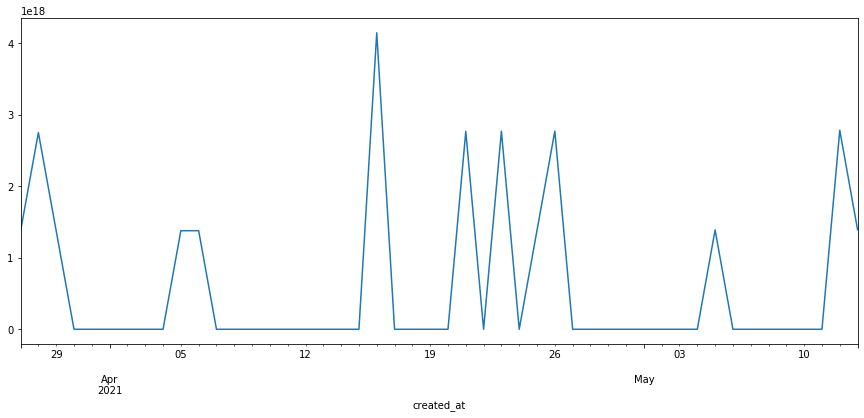

In [21]:
y = df['id'].resample('D').sum()
y.plot(figsize=(15, 6));

In [22]:
from wordcloud import WordCloud, STOPWORDS

In [26]:
def check_tweets(twitter_handle):
    json_str = []
    for status in tweepy.Cursor(api.user_timeline,id=twitter_handle).items(200):
        json_str.append(status._json)
    
    df = pd.DataFrame(json_str)
    df['created_at'] = pd.to_datetime(df['created_at'])
    df.set_index('created_at', inplace=True)
    
    y = df['id'].resample('D').count()
    y.plot(figsize=(15, 6))
    plt.show();

In [27]:
def check_tweets_wordcloud(twitter_handle, withall=True):
    json_str = []
    for status in tweepy.Cursor(api.user_timeline,id=twitter_handle).items(200):
        json_str.append(status._json)
    
    df = pd.DataFrame(json_str)
    
    if withall: 
        text = df.text.values
    else:
        text = ','.join([x for x in df.text.values])
        blob = TextBlob(text)
        text = blob.noun_phrases
    
    wordcloud = WordCloud(
        width = 3000
        , height = 2000
        , background_color = 'black'
        , stopwords = STOPWORDS
    ).generate(str(text))
    
    fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show();

In [ ]:
check_tweets('realDonaldTrump')

In [ ]:
check_tweets_wordcloud('realDonaldTrump', withall=False)

You can create a tweet as follows:

In [29]:
# create a tweet:
tweet = api.update_status('Test: Made with Tweepy')

(Nb. Don't abuse this feature! If you try to generate a zillion tweets in a loop, Twitter will ban youur account.)

Tweets can be deleted by reference to their `id_str` attribute:

In [30]:
# delete a tweet:
status = api.destroy_status(tweet.id_str)

You can follow a Tweeter:

In [31]:
# follow:
api.create_friendship('@YouTube')

User(_api=<tweepy.api.API object at 0x7f9ee22a3c88>, _json={'id': 10228272, 'id_str': '10228272', 'name': 'YouTube', 'screen_name': 'YouTube', 'location': 'San Bruno, CA', 'description': 'Like and subscribe.', 'url': 'https://t.co/qkVaJFk2CG', 'entities': {'url': {'urls': [{'url': 'https://t.co/qkVaJFk2CG', 'expanded_url': 'https://www.youtube.com/', 'display_url': 'youtube.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 73163285, 'friends_count': 1202, 'listed_count': 79252, 'created_at': 'Tue Nov 13 21:43:46 +0000 2007', 'favourites_count': 5535, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 33251, 'lang': None, 'status': {'created_at': 'Tue May 18 10:00:11 +0000 2021', 'id': 1394593653046321156, 'id_str': '1394593653046321156', 'text': '@thbaron27 @sohokofi 👑 The real Queen of fashion 👑', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name'

or unfollow:

In [32]:
# unfollow:
api.destroy_friendship('@YouTube')

User(_api=<tweepy.api.API object at 0x7f9ee22a3c88>, _json={'id': 10228272, 'id_str': '10228272', 'name': 'YouTube', 'screen_name': 'YouTube', 'location': 'San Bruno, CA', 'description': 'Like and subscribe.', 'url': 'https://t.co/qkVaJFk2CG', 'entities': {'url': {'urls': [{'url': 'https://t.co/qkVaJFk2CG', 'expanded_url': 'https://www.youtube.com/', 'display_url': 'youtube.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 73163285, 'friends_count': 1202, 'listed_count': 79252, 'created_at': 'Tue Nov 13 21:43:46 +0000 2007', 'favourites_count': 5535, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 33251, 'lang': None, 'status': {'created_at': 'Tue May 18 10:00:11 +0000 2021', 'id': 1394593653046321156, 'id_str': '1394593653046321156', 'text': '@thbaron27 @sohokofi 👑 The real Queen of fashion 👑', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name'

>
>

>
>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



